# <b>🚀 Building an SMS Spam Classifier 📱
</b>

### Objective
The goal of this project is to build a machine learning model that can classify SMS messages as either spam or legitimate. This classifier will help in filtering out unwanted spam messages, ensuring that users receive only relevant and important communications.



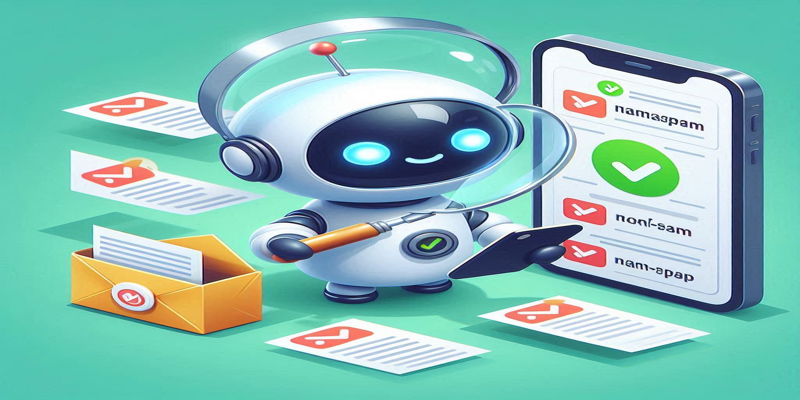

In [62]:
from PIL import Image
from IPython.display import display
display(Image.open('img.png').resize((800, 400)) or Image.open('img.png'))

Basic Libraries

In [63]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [64]:
import numpy as np
import pandas as pd


<b>Loading of the dataset:</b>
Structure of the Dataset


Columns:

 v1: This column contains the labels for the messages. The possible values are:
*    ham: Indicates that the message is not spam.
*    spam: Indicates that the message is spam.

  v2: This column contains the actual text of the messages.
*    Unnamed: 2, Unnamed: 3, Unnamed: 4: These columns contain NaN values, suggesting that they are either placeholders for future data or unnecessary columns that can be dropped 


In [65]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [66]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [67]:
df.shape

(5572, 5)

# <b>Data Cleaning</b>

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop last 3 columns:

In [69]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

Renamed the columns for better understanding:

In [70]:
df.rename(columns={'v1':'SMSlabel','v2':'TEXT'},inplace=True)
df.sample(5)


,SMSlabel,TEXT
340,ham,Ok that's great thanx a lot.
5293,ham,I donno its in your genes or something
1461,ham,Kinda. First one gets in at twelve! Aah. Speak...
4404,ham,Dun need to use dial up juz open da browser n ...
5074,spam,"This is the 2nd attempt to contract U, you hav..."


Missing values

In [71]:
df.isnull().sum()

SMSlabel    0
TEXT        0
dtype: int64

Check for duplicate values

In [72]:
df.duplicated().sum()

403

Remove duplicates

In [73]:
df = df.drop_duplicates(keep='first')

In [74]:
df.duplicated().sum()

0

In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [76]:
df.columns

Index(['SMSlabel', 'TEXT'], dtype='object')

In [77]:
df['SMSlabel'] = encoder.fit_transform(df['SMSlabel'])

In [78]:
df.head()

# ham = 0
# spam = 1

,SMSlabel,TEXT
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis 

In [79]:
df['SMSlabel'].value_counts()

SMSlabel
0    4516
1     653
Name: count, dtype: int64

---- Data is imbalanced.

Visual representation of the label count:

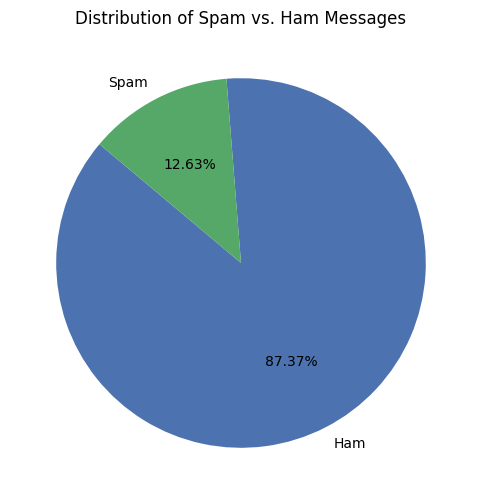

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(df['SMSlabel'].value_counts(),labels=['Ham','Spam'], autopct="%0.2f%%", startangle=140, colors=['#4c72b0','#55a868'])
plt.title('Distribution of Spam vs. Ham Messages')
plt.show()


info:NLTK(Natural Language Toolkit)is a comprehensive library in Python used for working with human language data (text).

NLTK provides tools to preprocess text, such as tokenization (splitting text into words or sentences), stemming (reducing words to their root form), and lemmatization (reducing words to their base or dictionary form).


In [81]:
import nltk

In [82]:
df['Num_Characters'] = df['TEXT'].apply(len)
df.head()

,SMSlabel,TEXT,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [83]:
df['Num_Words'] = df['TEXT'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,SMSlabel,TEXT,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [84]:
df['Num_Sentences'] = df['TEXT'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,SMSlabel,TEXT,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [85]:
df.columns

Index(['SMSlabel', 'TEXT', 'Num_Characters', 'Num_Words', 'Num_Sentences'], dtype='object')

In [86]:
df[['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
df_label_ham= df[df['SMSlabel'] == 0]
df_label_spam = df[df['SMSlabel'] == 1]

In [88]:
print("DataFrame with SMSlabel == 0:")
df_label_ham.head()

DataFrame with SMSlabel == 0:


,SMSlabel,TEXT,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2


In [89]:
print("DataFrame with SMSlabel == 1:")
df_label_spam.head()

DataFrame with SMSlabel == 1:


,SMSlabel,TEXT,Num_Characters,Num_Words,Num_Sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

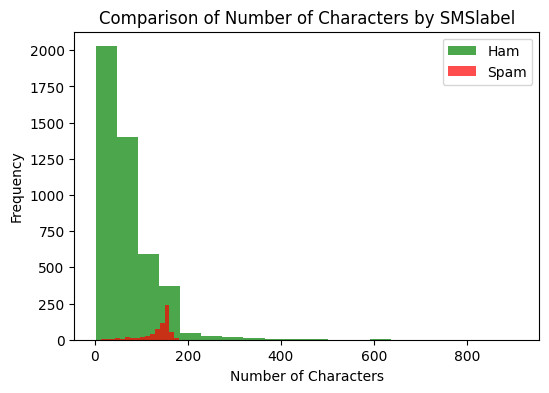

In [91]:
plt.figure(figsize=(6, 4))
plt.hist(df_label_ham['Num_Characters'], bins=20, alpha=0.7, color='green', label='Ham')
plt.hist(df_label_spam['Num_Characters'], bins=20, alpha=0.7, color='red', label='Spam')

# Add labels and title
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Comparison of Number of Characters by SMSlabel')
plt.legend()
plt.show()


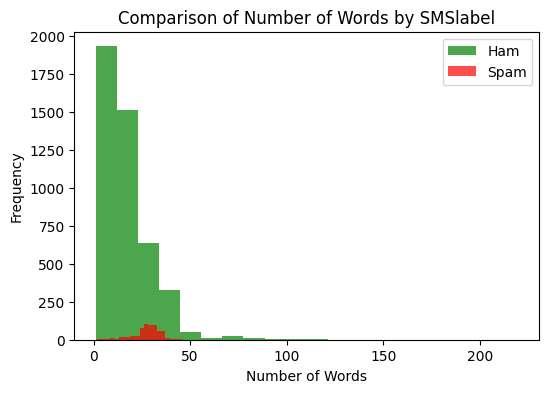

In [92]:
plt.figure(figsize=(6, 4))
plt.hist(df_label_ham['Num_Words'], bins=20, alpha=0.7, color='green', label='Ham')
plt.hist(df_label_spam['Num_Words'], bins=20, alpha=0.7, color='red', label='Spam')

# Add labels and title
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Comparison of Number of Words by SMSlabel')
plt.legend()
plt.show()

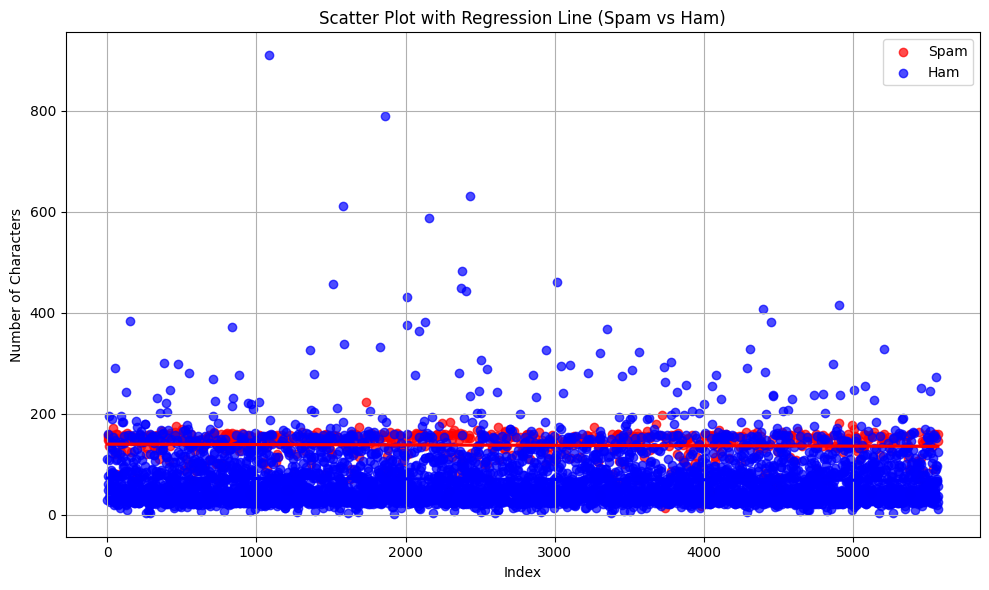

In [93]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_label_spam, x=df_label_spam.index, y='Num_Characters', color='red', scatter_kws={'alpha': 0.7}, label='Spam')
sns.regplot(data=df_label_ham, x=df_label_ham.index, y='Num_Characters', color='blue', scatter_kws={'alpha': 0.7}, label='Ham')
plt.title('Scatter Plot with Regression Line (Spam vs Ham)')
plt.xlabel('Index')
plt.ylabel('Number of Characters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


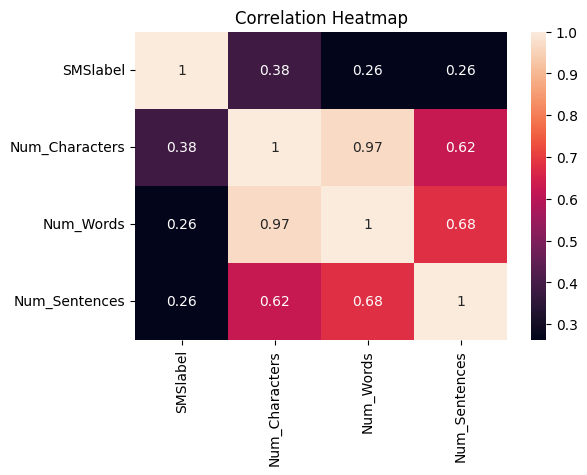

In [94]:
import seaborn as sns
correlation_matrix = df[['SMSlabel','Num_Characters', 'Num_Words', 'Num_Sentences']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Data preprocessing

 `Lower case`

`Tokenization` 

`Removing special characters`

`Removing stop words and punctuation`

`Stemming`

In [95]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re

In [96]:
texts = df['TEXT'].tolist()

In [97]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [98]:
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [re.sub(r'[^a-z]', '', token) for token in tokens]  
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if token not in string.punctuation]
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
  # Join tokens back into a string
    return ' '.join(stemmed_tokens)
df['TRANSFORMED_TEXT'] = [preprocess_text(text) for text in texts]

In [99]:
df.head()

,SMSlabel,TEXT,Num_Characters,Num_Words,Num_Sentences,TRANSFORMED_TEXT
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah nt think goe usf live around though


In [100]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [101]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [102]:
spam_wc = wc.generate(df[df['SMSlabel'] == 1]['TRANSFORMED_TEXT'].str.cat(sep=" "))

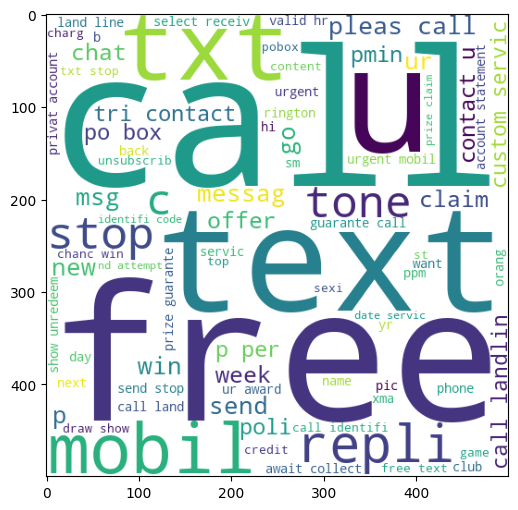

In [103]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [104]:
Ham_wc = wc.generate(df[df['SMSlabel'] == 0]['TRANSFORMED_TEXT'].str.cat(sep=" "))

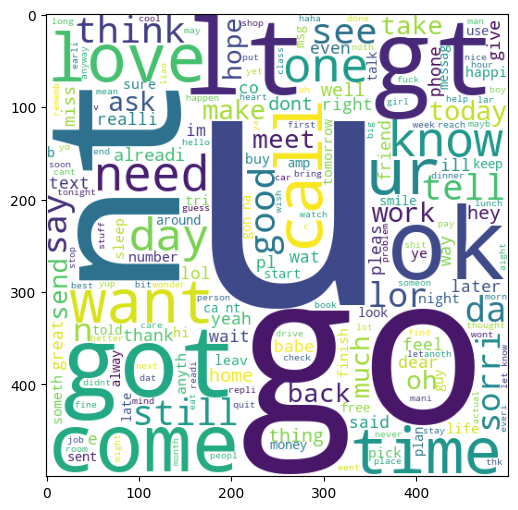

In [105]:
plt.figure(figsize=(15,6))
plt.imshow(Ham_wc)

# Model Building :

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [107]:
X = tfidf.fit_transform(df['TRANSFORMED_TEXT']).toarray()


In [108]:
X.shape

(5169, 3000)

In [109]:
y = df['SMSlabel'].values

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [112]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [113]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'GaussianNB': GaussianNB(),
        'MultinomialNB': MultinomialNB(),
        'BernoulliNB': BernoulliNB(),
        'LogisticRegression': LogisticRegression(max_iter=1000),
        'SVC': SVC()
    }

    results = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

    results_df = pd.DataFrame(results)
    return results_df

In [114]:
results_df = train_and_evaluate_models(X_train, X_test, y_train, y_test)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,GaussianNB,0.872340,0.905551,0.872340,0.883295
1,MultinomialNB,0.973888,0.974652,0.973888,0.972666
2,BernoulliNB,0.980658,0.980874,0.980658,0.980079
3,LogisticRegression,0.954545,0.955181,0.954545,0.951089
4,SVC,0.970986,0.971057,0.970986,0.969797


c:\Users\debam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\debam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\debam\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

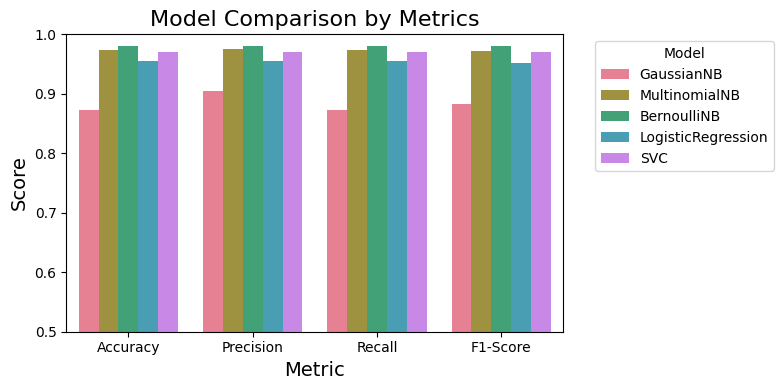

In [115]:
results_long_df = pd.melt(results_df, id_vars=['Model'], var_name='Metric', value_name='Value')
plt.figure(figsize=(8, 4))
sns.barplot(x='Metric', y='Value', hue='Model', data=results_long_df, palette='husl')
plt.title('Model Comparison by Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)
plt.ylim(0.5, 1.0)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sorting the result:

In [116]:
results_df = results_df.sort_values(by='Precision', ascending=False)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
print("Models ranked by Precision:")
results_df

Models ranked by Precision:


,Model,Accuracy,Precision,Recall,F1-Score
2,BernoulliNB,0.980658,0.980874,0.980658,0.980079
1,MultinomialNB,0.973888,0.974652,0.973888,0.972666
4,SVC,0.970986,0.971057,0.970986,0.969797
3,LogisticRegression,0.954545,0.955181,0.954545,0.951089
0,GaussianNB,0.872340,0.905551,0.872340,0.883295


## Model Performance Summary

### Metrics

- **Accuracy**: Proportion of correctly classified messages.
- **Precision**: Proportion of correctly identified spam messages out of all identified spam messages.
- **Recall**: Proportion of actual spam messages correctly identified.
- **F1-Score**: Harmonic mean of precision and recall.

### Notice:

- **BernoulliNB** performs the best overall with the highest accuracy (0.981), precision (0.981), recall (0.981), and F1-Score (0.980).
- **MultinomialNB** and **SVC** also show strong performance but slightly lower metrics compared to BernoulliNB.
- **GaussianNB** and **Logistic Regression** have the lowest scores among the models tested.

BernoulliNB is the most effective model for classifying spam messages based on these metrics.


In [117]:
import joblib
joblib.dump(BernoulliNB, 'bernoulli_nb_model.pkl')
loaded_model = joblib.load('bernoulli_nb_model.pkl')